<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>



**Temas**  
* Diseño y entrenamiento de Redes Neuronales Convolucionales (CNNs).
* Regularización en Redes Convolucionales.
* *Transfer Learning.*
* Aplicaciones de las Redes Neuronales Convolucionales

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* **Fecha de entrega y discusión: 23 de Noviembre**
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<margarita.bugueno.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<cvalle@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF395-II-2018] 

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Convolutional Neural Networks (CNN) en CIFAR.  
[2.](#segundo) Transfer Learning.   
[3.](#tercero) Convolutional Neural Network sobre texto.


### **Nota Importante:**  
Para esta actividad **si es que no se cuenta con GPU** se recomienda utilizar el entorno virtual de __[Colaboratory - Google](https://colab.research.google.com/)__* . Así, podrá programar en la nube con recursos elevados y luego descargar el Jupyter Notebook y entregarlo en modo Informe.


<a id="tercero"></a>
## 2. *Transfer Learning*

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/05/31130754/transfer-learning.jpeg" , style="float: right;" />

En esta sección se trabajará con el dataset trabajado anteriormente, CIFAR [3], pero en su versión más fina, en el cual se presentan 100 tipos distintos de categorías a clasificar la imagen (mutuamente excluyente), no 10 como se usó en las actividades anteriores. La estructura es la misma, son 60000 imágenes RGB de 32 $\times$ 32 píxeles separados en 50 mil de entrenamiento y 10 mil de pruebas.  
Aquí se experimentará con el concepto de *transfer learning* el cual consta en transferir conocimiento de un dominio fuente (*source domain*) a un dominio objetivo (*target domain*). En redes neuronales existen muchas representaciones de esto, en común consta en pre inicializar los pesos de la red de alguna manera que no sea con distribuciones de manera aleatoria (*fine tunning*). También está lo que es utilizar una representación generada a través de otra red entrenada con muchos datos, esto es tomar la red y "*congelar*" sus primeras capas para tomar esta representación y no entrenar esos pesos, lo que realizaremos en esta sección. 

Para cargar los datos utilice el siguiente comando:
```python
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
```

Normalice entre [0,1] y transforme las etiquetas en *one hot vectors*.
```python
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
```



> a) Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 *epochs*, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (*accuracy*) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el *accuracy* del modelo final sobre el conjunto de pruebas.
```python
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
...#add clasification layer
model.summary()
```
<div class="alert alert-block alert-info">Se utiliza una tasa de aprendizaje pequeña ya que es lo recomendable en *transfer learning*.</div>
>```python
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test)) #train it
```



> b) Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del *pooling*, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.



> c) Una forma de hacer lo que se conoce como *transfer learning* es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de *keras*. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.  
*Recuerde normalizar los datos de la manera en que fue entrenado VGG* ¿Cuál es éste proceso?
```python
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)
input_tensor=Input(shape=x_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
modelVGG.summary()
```



> d) Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 *epochs* y grafique las curvas de entrenamiento con respecto al modelo definido en a) o con regularización definido en b) ¿Qué sucede? Comente.
```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
...#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))
```



> e) Agregue una capa de normalización (*Batch Normalization* [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por **15 *epochs***. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de *epochs* y comente sobre el tiempo de ejecución de este entrenamiento.
```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
...#clasification
```



> f) Finalmente experimente con utilizar toda la red pre-entrenada, eliminando la capa de clasificación de mil neuronas de VGG reemplazandola por la capa de clasificación para su modelo (o con alguna capa extra si estima conveniente), dejando "congelada" toda la red para atrás, ésto quiere decir que utilizará la representación generada por la última capa (no de clasificación) de la red VGG, ésto es las capas densas, no la convolucional como en la parte c). Grafique las curvas de entrenamiento (función de pérdida/*loss*) , comparando con b) y e).
```python
input_tensor=Input(shape=x_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=True,input_tensor=input_tensor ) #LOAD PRETRAINED MODEL 
modelVGG.layers.pop() #delete last softmax layer
modelVGG.summary()
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
"""Add your network"""
model = Sequential()
model.add(BatchNormalization())
model.add(Dropout(0.5))
... #add your classification layer
"""train it! """
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

> g) ¿Cuándo podría ser útil y cuando no utilizar *transfer learning* o una red pre-entrenada?

# Desarrollo

##Carga Librerias y Dataset

In [0]:
#carga librerias

import keras
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
#carga dataset

from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

50000 50000 10000 10000


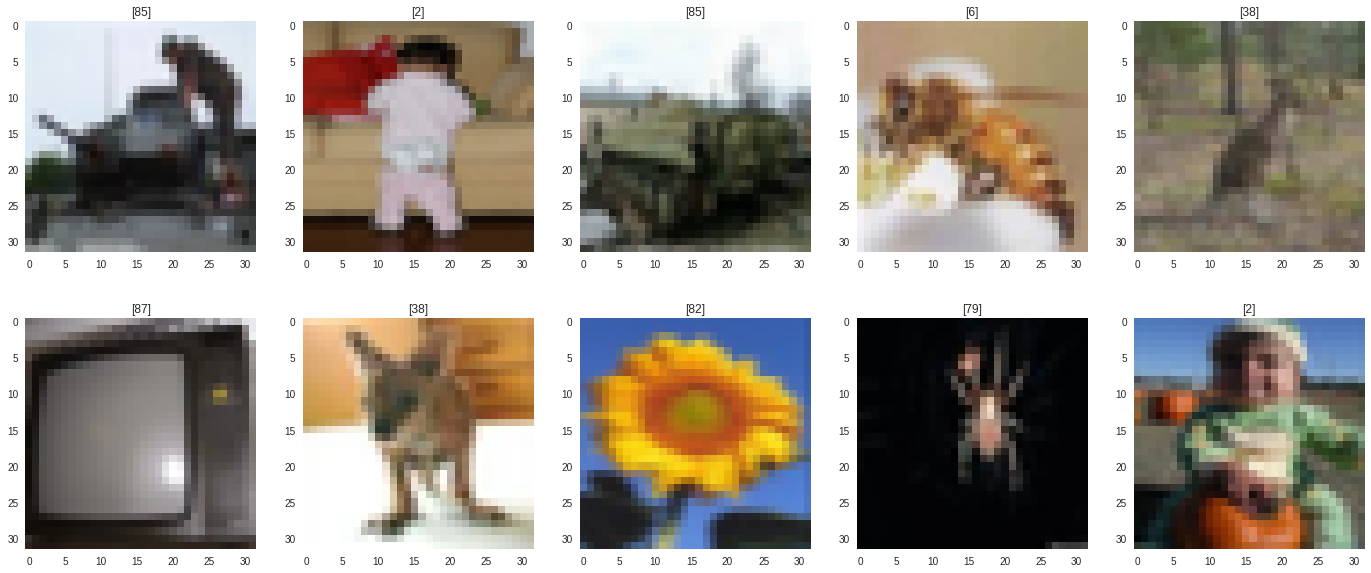

In [0]:
import matplotlib.pyplot as plt
print(len(x_train),
len(y_train),
len(x_test),
len(y_test))
#  x_train           Arreglo de imagenes 32x32
#  x_train[x]        Una imagen
#  x_train[x][y]     Un pixel RGB
#  x_train[x][y][z]  Un canal del RGB
#  y_train[x]        Indice de la respuesta en label_names, entero de 0 a 9      

import random

fig = plt.figure(figsize=(24,10))
plt.tight_layout()
for i in range(10):
  plt.subplot(2,5,i+1)
  img=int(random.random()*len(x_train))
  #plt.xlabel(label_names[y_train[img][0]])
  plt.title(y_train[img])
  plt.imshow(x_train[img])
  plt.grid(False)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

Este dataset es similar al cifar10 utilizado en la pregunta 1, pero cifar100 se diferencia en que cuenta con 100 clases. Este dataset cuenta con 50000 datapoints, imagenes de 32x32 con un label que representa el objeto enmarcado. 

## a) CNN Normal
Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 epochs, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (accuracy) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el accuracy del modelo final sobre el conjunto de pruebas.

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.optimizers import SGD

model_a = Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model_a.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_a.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Flatten())
model_a.add(Dense(1024,activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(100))
model_a.add(Activation('softmax'))
model_a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

Se utiliza una tasa de aprendizaje pequeña ya que es lo recomendable en transfer learning.

In [0]:
optimizer_ = SGD(lr=0.01,momentum=0.9)
model_a.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_a=model_a.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test)) #train it

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 282us/step - loss: 4.3826 - acc: 0.0394 - val_loss: 3.9389 - val_acc: 0.1008
Epoch 2/15
50000/50000 [==============================] - 12s 240us/step - loss: 3.7896 - acc: 0.1226 - val_loss: 3.4597 - val_acc: 0.1782
Epoch 3/15
50000/50000 [==============================] - 12s 241us/step - loss: 3.3904 - acc: 0.1921 - val_loss: 3.0906 - val_acc: 0.2544
Epoch 4/15
50000/50000 [==============================] - 12s 241us/step - loss: 3.0587 - acc: 0.2574 - val_loss: 2.8140 - val_acc: 0.3088
Epoch 5/15
50000/50000 [==============================] - 12s 238us/step - loss: 2.7902 - acc: 0.3080 - val_loss: 2.6784 - val_acc: 0.3299
Epoch 6/15
50000/50000 [==============================] - 12s 239us/step - loss: 2.5511 - acc: 0.3518 - val_loss: 2.5157 - val_acc: 0.3647
Epoch 7/15
50000/50000 [==============================] - 12s 241us/step - loss: 2.3440 - acc: 0.3954 - val_loss: 2.

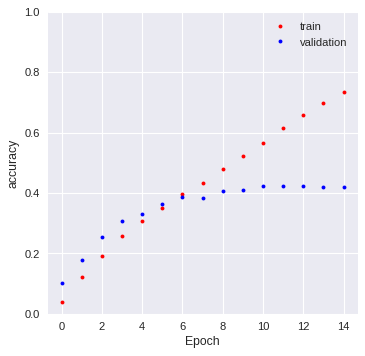

In [0]:
plt.figure(None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history_a.history['acc'],'.r',label='train');
plt.plot(history_a.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

El tiempo de entrenamiento fue bastante corto, si bien el entrenamiento de capas convolucionales requiere un mayor tiempo de procesamiento, con el uso de un batch_size relativamente grande se logra optimizar bastante el entrenamiento. 

Por otro lado el maximo accuracy en el conjunto de validación se dio en el epoch 11 y es de 0.4245, luego de ese punto se estanca el aumento y comienza claramente el overfitting.

##b) Se agrega Dropout, busca de posición optima.
Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del pooling, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.

In [0]:
#dropout despues de cada uno de los conjuntos de capas conv
model_b_1 = Sequential()
model_b_1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model_b_1.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model_b_1.add(Dropout(0.25))
model_b_1.add(MaxPooling2D(pool_size=(2, 2)))
model_b_1.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_1.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_1.add(Dropout(0.25))
model_b_1.add(MaxPooling2D(pool_size=(2, 2)))
model_b_1.add(Flatten())
model_b_1.add(Dense(1024,activation='relu'))
model_b_1.add(Dropout(0.5))
model_b_1.add(Dense(100))
model_b_1.add(Activation('softmax'))

#dropout entremedio de cada uno de los conjuntos de capas conv
model_b_2 = Sequential()
model_b_2.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model_b_2.add(Dropout(0.25))
model_b_2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model_b_2.add(MaxPooling2D(pool_size=(2, 2)))
model_b_2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_2.add(Dropout(0.25))
model_b_2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_2.add(MaxPooling2D(pool_size=(2, 2)))
model_b_2.add(Flatten())
model_b_2.add(Dense(1024,activation='relu'))
model_b_2.add(Dropout(0.5))
model_b_2.add(Dense(100))
model_b_2.add(Activation('softmax'))

#dropout entremedio y despues de cada uno de los conjuntos de capas conv
model_b_3 = Sequential()
model_b_3.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model_b_3.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model_b_3.add(MaxPooling2D(pool_size=(2, 2)))
model_b_3.add(Dropout(0.25))
model_b_3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_3.add(MaxPooling2D(pool_size=(2, 2)))
model_b_3.add(Dropout(0.25))
model_b_3.add(Flatten())
model_b_3.add(Dense(1024,activation='relu'))
model_b_3.add(Dropout(0.5))
model_b_3.add(Dense(100))
model_b_3.add(Activation('softmax'))

#desdpues de cada conv y despues de maxpool
model_b_4 = Sequential()
model_b_4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model_b_4.add(Dropout(0.25))
model_b_4.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model_b_4.add(Dropout(0.25))
model_b_4.add(MaxPooling2D(pool_size=(2, 2)))
model_b_4.add(Dropout(0.25))
model_b_4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_4.add(Dropout(0.25))
model_b_4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_4.add(Dropout(0.25))
model_b_4.add(MaxPooling2D(pool_size=(2, 2)))
model_b_4.add(Dropout(0.25))
model_b_4.add(Flatten())
model_b_4.add(Dense(1024,activation='relu'))
model_b_4.add(Dropout(0.5))
model_b_4.add(Dense(100))
model_b_4.add(Activation('softmax'))

#despues de cada conv unicamente
model_b_5 = Sequential()
model_b_5.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
model_b_5.add(Dropout(0.25))
model_b_5.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model_b_5.add(Dropout(0.25))
model_b_5.add(MaxPooling2D(pool_size=(2, 2)))
model_b_5.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_5.add(Dropout(0.25))
model_b_5.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model_b_5.add(Dropout(0.25))
model_b_5.add(MaxPooling2D(pool_size=(2, 2)))
model_b_5.add(Flatten())
model_b_5.add(Dense(1024,activation='relu'))
model_b_5.add(Dropout(0.5))
model_b_5.add(Dense(100))
model_b_5.add(Activation('softmax'))

In [0]:
optimizer_ = SGD(lr=0.01,momentum=0.9)
epochs=25;
model_b_1.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b_1=model_b_1.fit(x_train_norm, y_train, batch_size=128,epochs=epochs,verbose=1, validation_data=(x_test_norm,y_test)) #train it
model_b_2.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b_2=model_b_2.fit(x_train_norm, y_train, batch_size=128,epochs=epochs,verbose=1, validation_data=(x_test_norm,y_test)) #train it
model_b_3.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b_3=model_b_3.fit(x_train_norm, y_train, batch_size=128,epochs=epochs,verbose=1, validation_data=(x_test_norm,y_test)) #train it
model_b_4.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b_4=model_b_4.fit(x_train_norm, y_train, batch_size=128,epochs=epochs,verbose=1, validation_data=(x_test_norm,y_test)) #train it
model_b_5.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
history_b_5=model_b_5.fit(x_train_norm, y_train, batch_size=128,epochs=epochs,verbose=1, validation_data=(x_test_norm,y_test)) #train it

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 15s 296us/step - loss: 4.3001 - acc: 0.0504 - val_loss: 4.0452 - val_acc: 0.1129
Epoch 2/15
50000/50000 [==============================] - 14s 282us/step - loss: 3.7333 - acc: 0.1338 - val_loss: 3.5884 - val_acc: 0.1838
Epoch 3/15
50000/50000 [==============================] - 14s 282us/step - loss: 3.3556 - acc: 0.1980 - val_loss: 3.3722 - val_acc: 0.2346
Epoch 4/15
50000/50000 [==============================] - 14s 281us/step - loss: 3.0521 - acc: 0.2568 - val_loss: 3.0040 - val_acc: 0.3046
Epoch 5/15
50000/50000 [==============================] - 14s 282us/step - loss: 2.8061 - acc: 0.3048 - val_loss: 2.9098 - val_acc: 0.3409
Epoch 6/15
50000/50000 [==============================] - 14s 282us/step - loss: 2.6031 - acc: 0.3407 - val_loss: 2.6958 - val_acc: 0.3632
Epoch 7/15
50000/50000 [==============================] - 14s 283us/step - loss: 2.3993 - acc: 0.3825 - val_loss: 2.

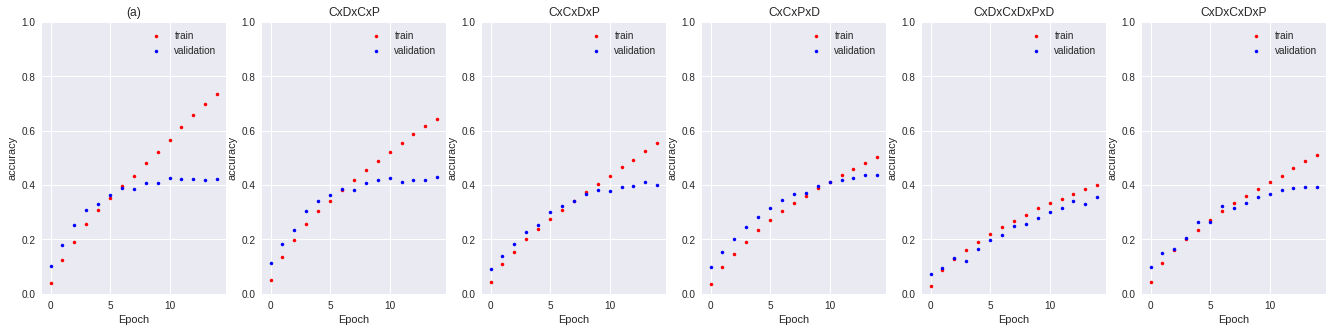

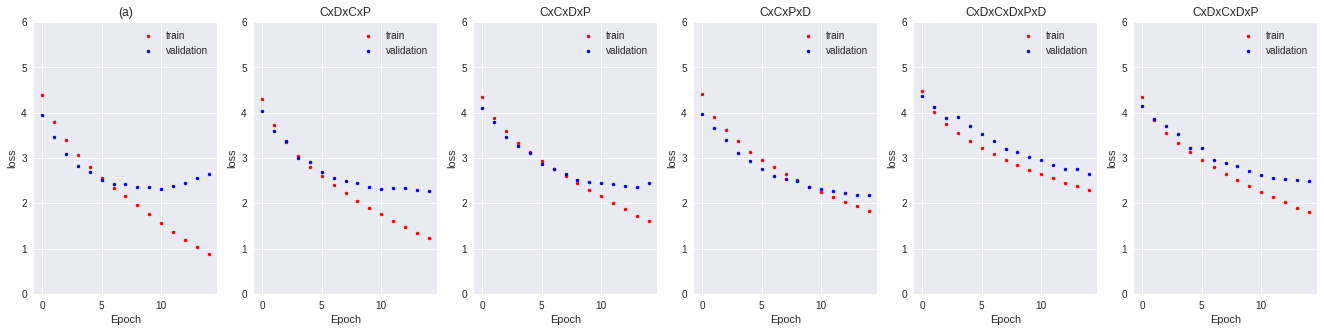

In [0]:
plt.figure(figsize=(23,5))

plt.subplot(1,6,1)
plt.plot(history_a.history['acc'],'.r',label='train');
plt.plot(history_a.history['val_acc'],'.b',label='validation');
plt.title('(a)')
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(1,6,2)
plt.plot(history_b_1.history['acc'],'.r',label='train');
plt.plot(history_b_1.history['val_acc'],'.b',label='validation');
plt.title('CxDxCxP')
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(1,6,3)
plt.plot(history_b_2.history['acc'],'.r',label='train');
plt.plot(history_b_2.history['val_acc'],'.b',label='validation');
plt.title('CxCxDxP')
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(1,6,4)
plt.plot(history_b_3.history['acc'],'.r',label='train');
plt.plot(history_b_3.history['val_acc'],'.b',label='validation');
plt.title('CxCxPxD')
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(1,6,5)
plt.plot(history_b_4.history['acc'],'.r',label='train');
plt.plot(history_b_4.history['val_acc'],'.b',label='validation');
plt.title('CxDxCxDxPxD')
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(1,6,6)
plt.plot(history_b_5.history['acc'],'.r',label='train');
plt.plot(history_b_5.history['val_acc'],'.b',label='validation');
plt.title('CxDxCxDxP')
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.figure(figsize=(23,5))

plt.subplot(1,6,1)
plt.plot(history_a.history['loss'],'.r',label='train');
plt.plot(history_a.history['val_loss'],'.b',label='validation');
plt.title('(a)')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.ylim([0,6]);
plt.legend();

plt.subplot(1,6,2)
plt.plot(history_b_1.history['loss'],'.r',label='train');
plt.plot(history_b_1.history['val_loss'],'.b',label='validation');
plt.title('CxDxCxP')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.ylim([0,6]);
plt.legend();

plt.subplot(1,6,3)
plt.plot(history_b_2.history['loss'],'.r',label='train');
plt.plot(history_b_2.history['val_loss'],'.b',label='validation');
plt.title('CxCxDxP')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.ylim([0,6]);
plt.legend();

plt.subplot(1,6,4)
plt.plot(history_b_3.history['loss'],'.r',label='train');
plt.plot(history_b_3.history['val_loss'],'.b',label='validation');
plt.title('CxCxPxD')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.ylim([0,6]);
plt.legend();

plt.subplot(1,6,5)
plt.plot(history_b_4.history['loss'],'.r',label='train');
plt.plot(history_b_4.history['val_loss'],'.b',label='validation');
plt.title('CxDxCxDxPxD')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.ylim([0,6]);
plt.legend();

plt.subplot(1,6,6)
plt.plot(history_b_5.history['loss'],'.r',label='train');
plt.plot(history_b_5.history['val_loss'],'.b',label='validation');
plt.title('CxDxCxDxP')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.ylim([0,6]);
plt.legend();

##c) 
Una forma de hacer lo que se conoce como transfer learning es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de keras. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.
Recuerde normalizar los datos de la manera en que fue entrenado VGG ¿Cuál es éste proceso?



In [0]:
from keras import Input
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
x_train_vgg = preprocess_input(x_train)#esto normaliza las entradas como lo hicieron en vgg16
x_test_vgg = preprocess_input(x_test)
input_tensor=Input(shape=x_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

##d) 
Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 epochs y grafique las curvas de entrenamiento con respecto al modelo definido en a) o con regularización definido en b) ¿Qué sucede? Comente.

In [0]:
epochs_=10;
optimizer_ = SGD(lr=0.01,momentum=0.9)
model_d = Sequential()
model_d.add(Flatten(input_shape=features_train.shape[1:]))
model_d.add(Dense(1024, activation='relu'))
model_d.add(Dropout(0.5))
model_d.add(Dense(100))
model_d.add(Activation('softmax'))
model_d.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model_d.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 53us/step - loss: 14.7278 - acc: 0.0795 - val_loss: 14.6919 - val_acc: 0.0860
Epoch 2/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.6716 - acc: 0.0876 - val_loss: 14.6713 - val_acc: 0.0878
Epoch 3/10
50000/50000 [==============================] - 2s 41us/step - loss: 14.7077 - acc: 0.0863 - val_loss: 14.6729 - val_acc: 0.0884
Epoch 4/10
50000/50000 [==============================] - 2s 42us/step - loss: 14.6780 - acc: 0.0884 - val_loss: 14.5887 - val_acc: 0.0941
Epoch 5/10
50000/50000 [==============================] - 2s 42us/step - loss: 14.5864 - acc: 0.0942 - val_loss: 14.5943 - val_acc: 0.0939
Epoch 6/10
50000/50000 [==============================] - 2s 42us/step - loss: 14.6412 - acc: 0.0909 - val_loss: 14.5728 - val_acc: 0.0953
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 14.5710 - acc: 0.0953 - val_loss: 14.

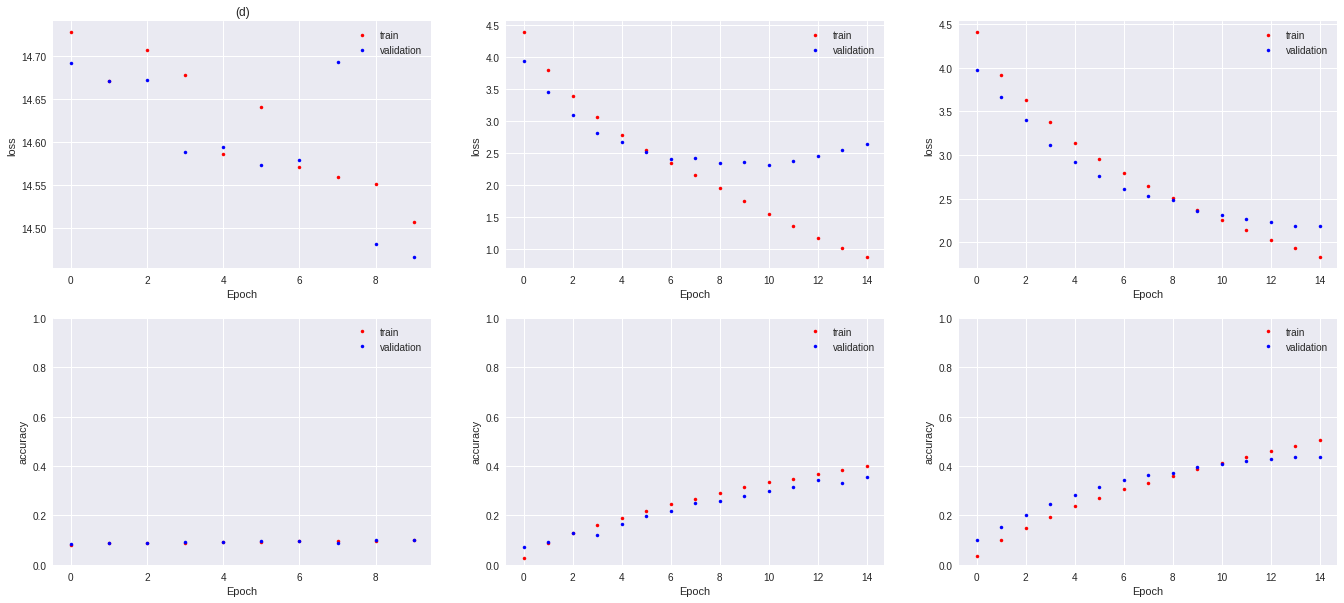

In [0]:
plt.figure(figsize=(23,10))

plt.subplot(2,3,1)
plt.title('(d)')
plt.plot(model_d.history.history['loss'],'.r',label='train');
plt.plot(model_d.history.history['val_loss'],'.b',label='validation');
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,3,4)
plt.plot(model_d.history.history['acc'],'.r',label='train');
plt.plot(model_d.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(2,3,2)
plt.title('')
plt.plot(model_a.history.history['loss'],'.r',label='train');
plt.plot(model_a.history.history['val_loss'],'.b',label='validation');
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,3,5)
plt.plot(model_b_4.history.history['acc'],'.r',label='train');
plt.plot(model_b_4.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(2,3,3)
plt.plot(model_b_3.history.history['loss'],'.r',label='train');
plt.plot(model_b_3.history.history['val_loss'],'.b',label='validation');
plt.title('Red Original')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,3,6)
plt.plot(model_b_3.history.history['acc'],'.r',label='train');
plt.plot(model_b_3.history.history['val_acc'],'.b',label='validation');
plt.title('Red con Dropout');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

Podemos observar que el comportamiento durante el entrenamiento es bastante caotico y en general con resultados más deficientes que los anteriores. Porque ?

e) Agregue una capa de normalización (Batch Normalization [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por 15 epochs. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de epochs y comente sobre el tiempo de ejecución de este entrenamiento.

In [0]:
from keras.layers import BatchNormalization

epochs_=15;

model_e = Sequential()
model_e.add(Flatten(input_shape=features_train.shape[1:]))
model_e.add(BatchNormalization())
model_e.add(Dense(1024, activation='relu'))
model_e.add(BatchNormalization())
model_e.add(Dropout(0.5))
model_e.add(Dense(100))
model_e.add(Activation('softmax'))
model_e.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model_e.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 5s 93us/step - loss: 3.3012 - acc: 0.2717 - val_loss: 2.4286 - val_acc: 0.3929
Epoch 2/15
50000/50000 [==============================] - 3s 69us/step - loss: 2.4651 - acc: 0.3807 - val_loss: 2.3163 - val_acc: 0.4077
Epoch 3/15
50000/50000 [==============================] - 4s 71us/step - loss: 2.2534 - acc: 0.4123 - val_loss: 2.2531 - val_acc: 0.4237
Epoch 4/15
50000/50000 [==============================] - 4s 70us/step - loss: 2.1202 - acc: 0.4362 - val_loss: 2.2286 - val_acc: 0.4204
Epoch 5/15
50000/50000 [==============================] - 4s 71us/step - loss: 2.0194 - acc: 0.4580 - val_loss: 2.2052 - val_acc: 0.4352
Epoch 6/15
50000/50000 [==============================] - 4s 71us/step - loss: 1.9383 - acc: 0.4735 - val_loss: 2.1977 - val_acc: 0.4341
Epoch 7/15
50000/50000 [==============================] - 4s 72us/step - loss: 1.8538 - acc: 0.4892 - val_loss: 2.2049 - val_acc

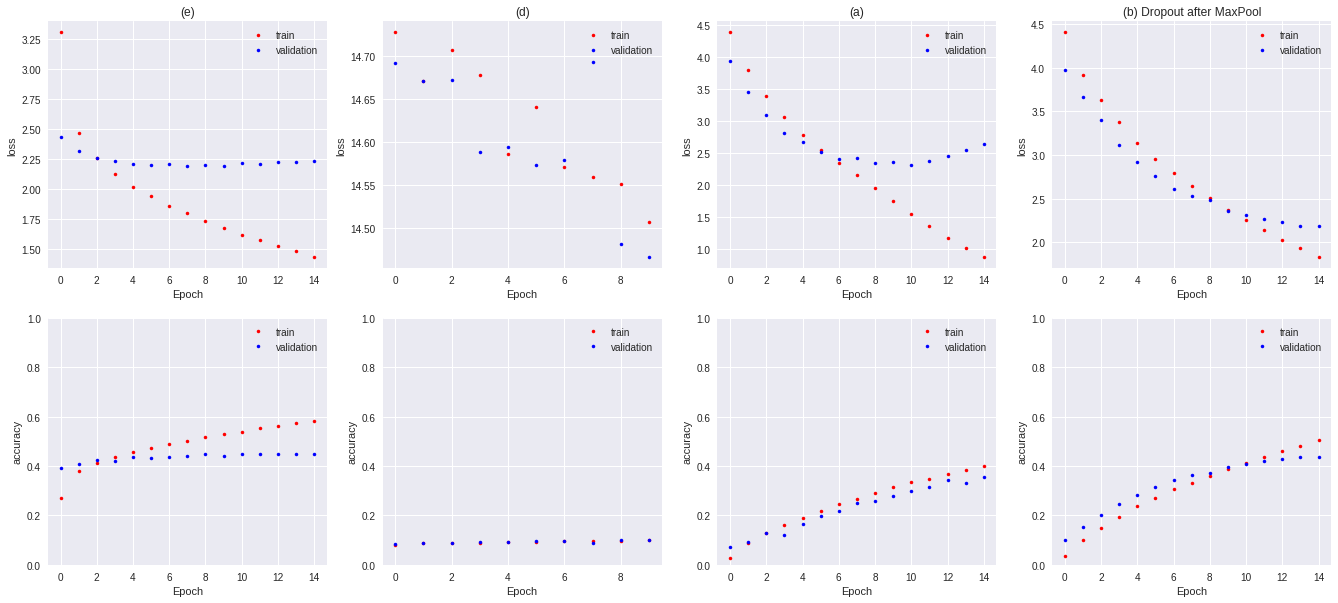

In [0]:
plt.figure(figsize=(23,10))

plt.subplot(2,4,1)
plt.plot(model_e.history.history['loss'],'.r',label='train');
plt.plot(model_e.history.history['val_loss'],'.b',label='validation');
plt.title('(e)')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,4,5)
plt.plot(model_e.history.history['acc'],'.r',label='train');
plt.plot(model_e.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(2,4,2)
plt.title('(d)')
plt.plot(model_d.history.history['loss'],'.r',label='train');
plt.plot(model_d.history.history['val_loss'],'.b',label='validation');
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,4,6)
plt.plot(model_d.history.history['acc'],'.r',label='train');
plt.plot(model_d.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(2,4,3)
plt.title('')
plt.plot(model_a.history.history['loss'],'.r',label='train');
plt.plot(model_a.history.history['val_loss'],'.b',label='validation');
plt.title('(a)')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,4,7)
plt.plot(model_b_4.history.history['acc'],'.r',label='train');
plt.plot(model_b_4.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

plt.subplot(2,4,4)
plt.plot(model_b_3.history.history['loss'],'.r',label='train');
plt.plot(model_b_3.history.history['val_loss'],'.b',label='validation');
plt.title('(b) Dropout after MaxPool')
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(2,4,8)
plt.plot(model_b_3.history.history['acc'],'.r',label='train');
plt.plot(model_b_3.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

El desempeño mejoro significativamente al usar BatchNormalization, siendo el resultado superior a lo que se obtuvo en (a) y ligeramente mejor que (b). 

## f) (No se hace)
Finalmente experimente con utilizar toda la red pre-entrenada, eliminando la capa de clasificación de mil neuronas de VGG reemplazandola por la capa de clasificación para su modelo (o con alguna capa extra si estima conveniente), dejando "congelada" toda la red para atrás, ésto quiere decir que utilizará la representación generada por la última capa (no de clasificación) de la red VGG, ésto es las capas densas, no la convolucional como en la parte c). Grafique las curvas de entrenamiento (función de pérdida/loss) , comparando con b) y e).

In [0]:
from keras import Input
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)

In [0]:
input_tensor=Input(shape=x_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=True,input_tensor=input_tensor) # LOAD PRETRAINED MODEL 
modelVGG.layers.pop() #delete last softmax layer
modelVGG.summary()
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
"""Add your network"""
model_f = Sequential()
model_f.add(BatchNormalization())
model_f.add(Dropout(0.5))
model_f.add(Dense(100))
model_f.add(Activation('softmax'))
model_f.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model_f.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))
"""train it! """
model_f.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model_f.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))

ValueError: ignored

In [0]:
plt.subplot(1,2,1)
plt.plot(model_f.history.history['loss'],'.r',label='train');
plt.plot(model_f.history.history['val_loss'],'.b',label='validation');
plt.ylabel('loss');
plt.xlabel('Epoch')
plt.legend();

plt.subplot(1,2,2)
plt.plot(model_f.history.history['acc'],'.r',label='train');
plt.plot(model_f.history.history['val_acc'],'.b',label='validation');
plt.ylabel('accuracy');
plt.xlabel('Epoch')
plt.ylim([0,1]);
plt.legend();

## g)
¿Cuándo podría ser útil y cuando no utilizar transfer learning o una red pre-entrenada?

Sera de mayor utilidad utilizar una red pre-entrenada cuando se desee solucionar un problema similar al de la red que se usara como base, por ejemplo una red que este entrenada en detectar perros y gatos estaria bien condicionada para detectar caballos, pero quizás no tanto para detectar platos de comida.

En general mientras más distinto el dataset, más  porcentaje de la red pre-entrenada se vuelve a entrenar (este porcentaje reentrenado es de la parte superior de la red). Pero este porcentaje tambien dependera del tamaño del dataset, si este es demasiado pequeño no es posible entrenar lo suficiente a la red. La siguiente figura caracteriza muy bien estas elecciones y los trade-offs que existen.

![alt text](https://cdn-images-1.medium.com/max/750/1*7ZD-u-h8hFPuN2PYJvLMBw.png)

>fuente: [transfer learning from pre trained models](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751)